In [247]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn import manifold, datasets
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
from scipy import linalg
from sklearn.preprocessing import MinMaxScaler

In [248]:
#given points and neighbors return adjacency matrix
def neighbors(points,neighbors):
    nbrs=NearestNeighbors(n_neighbors=neighbors+1).fit(points) # nearest is always the same point
    distances,indices = nbrs.kneighbors(points)
    adjacency_matrix=np.zeros((np.shape(points)[0],np.shape(points)[0]))
    #building the matrix
    for i in range(len(indices)):
        for index in indices[i]:
            adjacency_matrix[i][index]=1
            adjacency_matrix[index][i]=1

    np.fill_diagonal(adjacency_matrix,0)
    return adjacency_matrix


In [249]:
#given the adjacency matrix return the laplacian matrix and the diagonal matrix
def laplacian_matrix(adjacency_matrix):
    # extracts the diagonal and create diagonal matrix
    diagonal_matrix=np.zeros((np.shape(adjacency_matrix)[0],np.shape(adjacency_matrix)[0]))
    diagonal_sum=np.sum(adjacency_matrix,axis=1)
    np.fill_diagonal(diagonal_matrix,diagonal_sum)
    laplacian=diagonal_matrix-adjacency_matrix
    return laplacian,diagonal_matrix



In [250]:
#given the laplacian matrix find the eigen vectors
def get_eigen_vectors(laplacian,diagonal_matrix):
    eigen_vals,eigen_vectors=linalg.eigh (laplacian,diagonal_matrix)
    eigen_vectors=eigen_vectors[:,1:] # drop zero eigen vector
    return eigen_vectors

In [251]:
# return the points after the embedding
def spectral_embedding(eigen_vectors,dim):
    # use only the dim amount of eigen_vectors
    dim_vectors=eigen_vectors[:,:dim]
    return dim_vectors


In [252]:
#function from scikit learn
def test():
    W = np.array([[0, 1, 1, 1],
              [1, 0, 0, 0],
              [1, 0, 0, 0],
              [1, 0, 0, 0]])
    y = manifold.spectral_embedding(adjacency=W,
                                n_components=1,
                                norm_laplacian=False,
                                drop_first=True,
                                eigen_solver='lobpcg')

test()

In [253]:
# test my method
def first_test():
    W = np.array([[0, 1, 1, 1],
              [1, 0, 0, 0],
              [1, 1, 0, 0],
              [1, 0, 0, 0]])
    laplacian,diagonal_matrix=laplacian_matrix(W)
    eigen_vectors=get_eigen_vectors(laplacian,diagonal_matrix)
    return eigen_vectors[:,1]

first_test()

array([ 0.23994173,  0.41559126, -0.50805578, -0.37192264])

In [254]:
def dimension_reduction(dataset,n_neighbors,dim):
    scaler=MinMaxScaler()
    scaler.fit(dataset)
    dataset=scaler.transform(dataset)
    adjacency_matrix=neighbors(dataset,n_neighbors)
    laplacian,diagonal_matrix=laplacian_matrix(adjacency_matrix)
    eigen_vectors=get_eigen_vectors(laplacian,diagonal_matrix)
    dim_vectors=spectral_embedding(eigen_vectors,dim)
    return dim_vectors


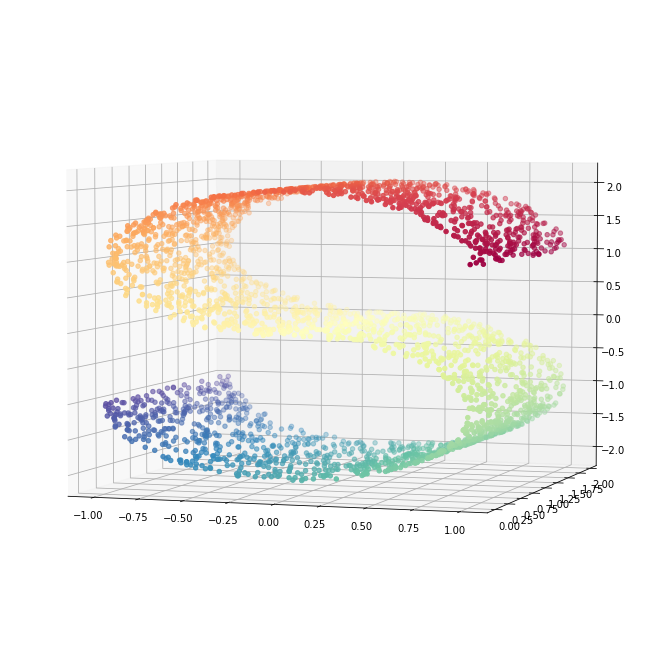

In [255]:
# Define the number of points to consider.
n_points = 3000

# Get the data and color map.
S_curve, S_colors = datasets.make_s_curve(n_points, random_state=0)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(S_curve[:, 0], S_curve[:, 1], S_curve[:, 2],
           c=S_colors,
           cmap=plt.cm.Spectral)
ax.view_init(4, -72);

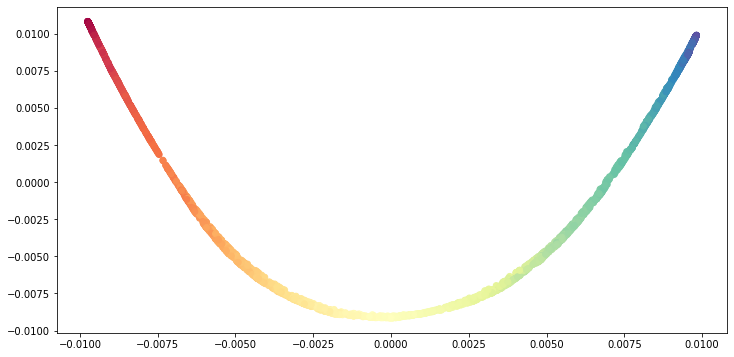

In [256]:
#S_curve implementation
fig = plt.figure(figsize=(12, 6))
S_2dim=dimension_reduction(S_curve,6,2)
S_2dim=S_2dim
ax = fig.add_subplot(111)
ax.scatter(S_2dim[:, 0], S_2dim[:, 1],
           c=S_colors,
           cmap=plt.cm.Spectral);

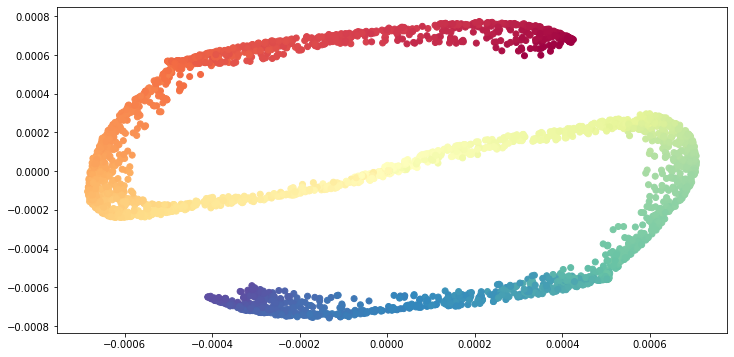

In [257]:
# Second s_curve implementation
S_2dim=dimension_reduction(S_curve,1500,2)
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.scatter(S_2dim[:, 0], S_2dim[:, 1],
           c=S_colors,
           cmap=plt.cm.Spectral);

In [258]:
# Create our sphere.
n_samples = 5000

angle_parameter = 0.5 # Try 0.01
pole_hole_parameter = 8 # Try 50

random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - angle_parameter)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / pole_hole_parameter))) &
           (t > ((np.pi / pole_hole_parameter))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
          np.sin(t[indices]) * np.sin(p[indices]), \
          np.cos(t[indices])

sphere_data = np.array([x, y, z]).T

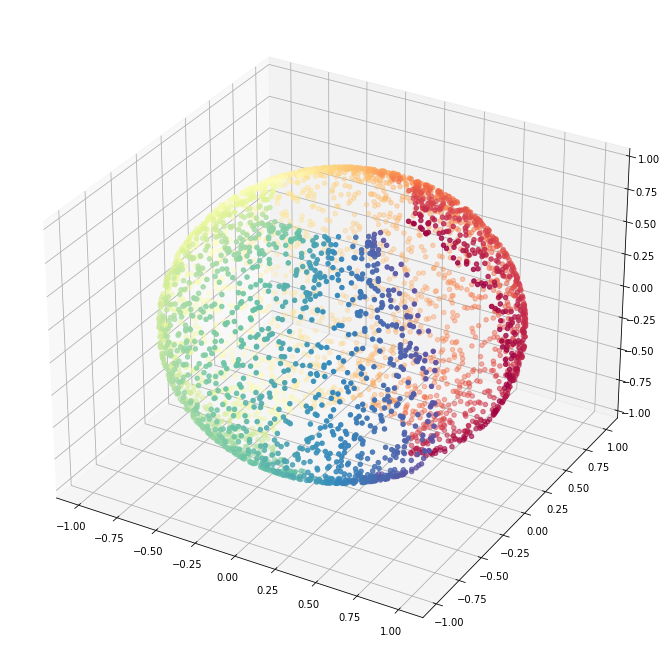

In [259]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           c=colors,
           cmap=plt.cm.Spectral);

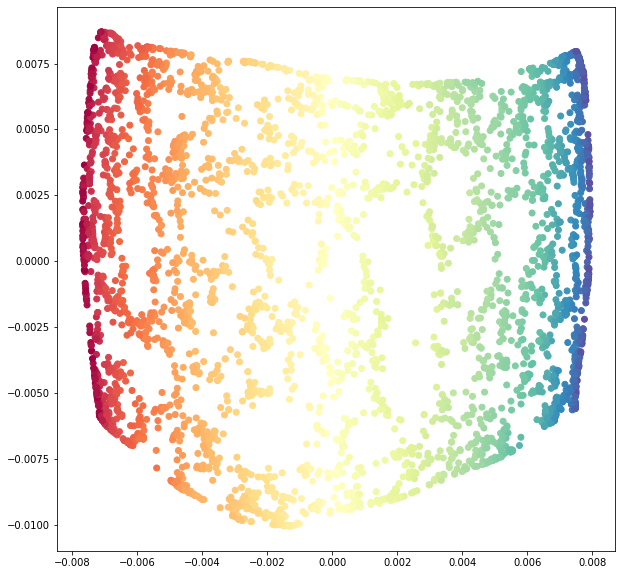

In [260]:
#first sphere implementation
n_neighbors = 8
n_components = 2
sphere_2dim=dimension_reduction(sphere_data,8,2)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(sphere_2dim[:, 0], sphere_2dim[:, 1],
           c=colors,
           cmap=plt.cm.Spectral);

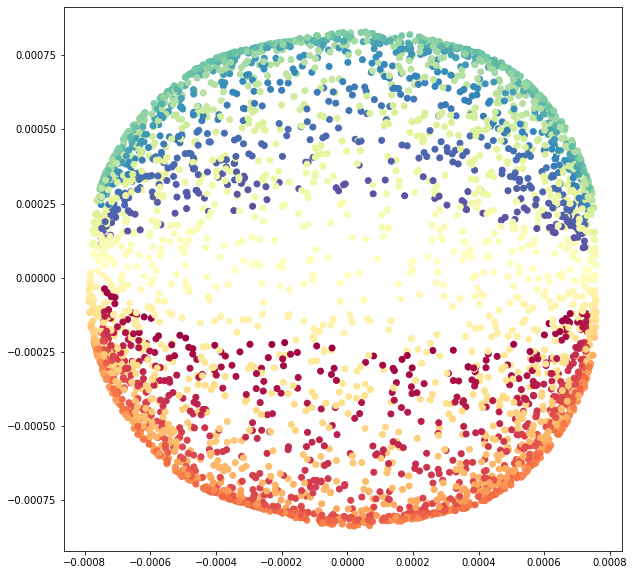

In [261]:
#second sphere implementation
n_neighbors = 1000
n_components = 2
sphere_2dim=dimension_reduction(sphere_data,n_neighbors,n_components)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(sphere_2dim[:, 0], sphere_2dim[:, 1],
           c=colors,
           cmap=plt.cm.Spectral);